<a href="https://colab.research.google.com/github/CatherineDemian/CatherineDemian-optimizer-comparison-cifar10-/blob/main/sgdfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2045 - loss: 2.2029 - val_accuracy: 0.2991 - val_loss: 1.9793
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3197 - loss: 1.9462 - val_accuracy: 0.3322 - val_loss: 1.9007
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3460 - loss: 1.8788 - val_accuracy: 0.3468 - val_loss: 1.8578
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3616 - loss: 1.8395 - val_accuracy: 0.3599 - val_loss: 1.8281
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3732 - loss: 1.8108 - val_accuracy: 0.3682 - val_loss: 1.8052
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3828 - loss: 1.7878 - val_accuracy: 0.3746 - val_loss: 1.7862
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3891 - loss: 1.7680 - val_accuracy: 0.3815 - val_loss: 1.7698
Epoch 8/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3948 - loss: 1

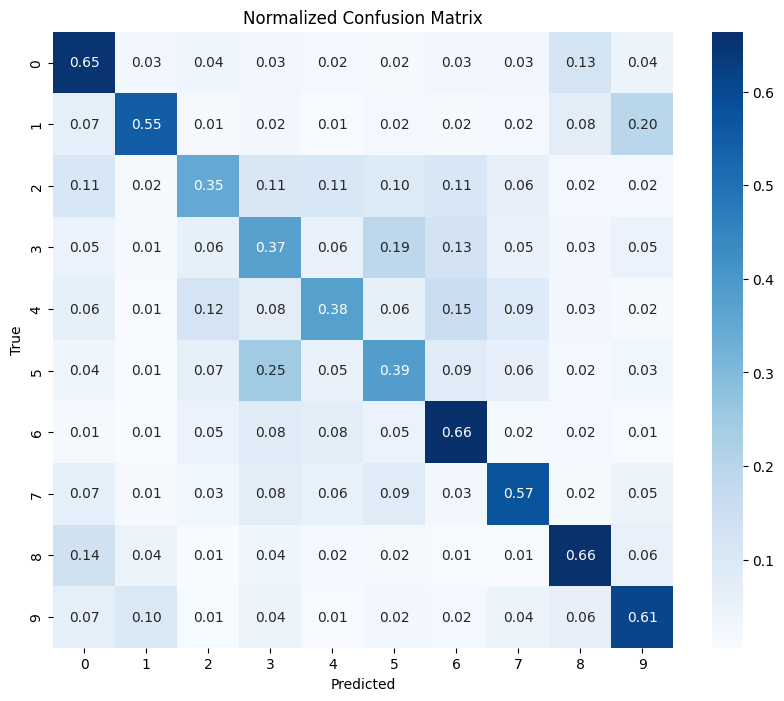

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.51      0.65      0.57      1000
     Class 1       0.70      0.55      0.62      1000
     Class 2       0.46      0.35      0.40      1000
     Class 3       0.34      0.37      0.35      1000
     Class 4       0.48      0.38      0.42      1000
     Class 5       0.41      0.39      0.40      1000
     Class 6       0.53      0.66      0.59      1000
     Class 7       0.60      0.57      0.58      1000
     Class 8       0.62      0.66      0.64      1000
     Class 9       0.57      0.61      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



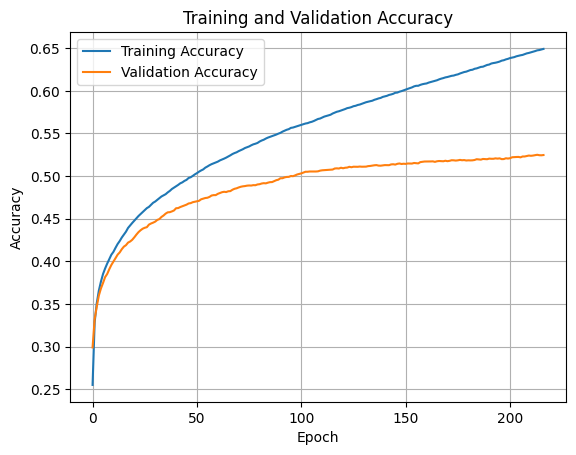

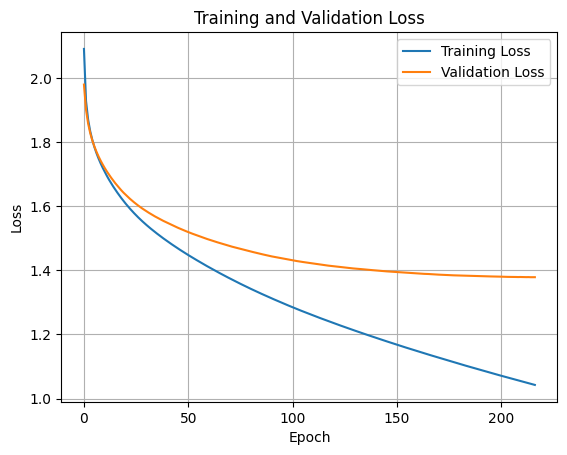

Training time: 807.57 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set the random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train_full.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train_full, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Stochastic Gradient Descent (SGD) optimizer
optimizer_stochastic = SGD(
    learning_rate=0.0001,
    momentum=0.9,
    nesterov=False
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer_stochastic,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 8 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


In [ ]:
# Map numeric labels to CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Get correctly and incorrectly classified indices
correct_indices = np.where(y_true == y_pred_classes)[0]
incorrect_indices = np.where(y_true != y_pred_classes)[0]

# Plot correctly classified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(correct_indices[:10]):  # Display 10 correct samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Images")
plt.tight_layout()
plt.show()

# Plot misclassified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Display 10 incorrect samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}", color='red')
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()


SGD with warm Restart

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2123 - loss: 2.1679 - val_accuracy: 0.2947 - val_loss: 1.9729
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3118 - loss: 1.9443 - val_accuracy: 0.3290 - val_loss: 1.8966
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3395 - loss: 1.8783 - val_accuracy: 0.3448 - val_loss: 1.8535
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3563 - loss: 1.8387 - val_accuracy: 0.3571 - val_loss: 1.8245
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3679 - loss: 1.8104 - val_accuracy: 0.3664 - val_loss: 1.8015
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3766 - loss: 1.7877 - val_accuracy: 0.3721 - val_loss: 1.7828
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3852 - loss: 1.7685 - val_accuracy: 0.3788 - val_loss: 1.7665
Epoch 8/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3904 - loss: 1

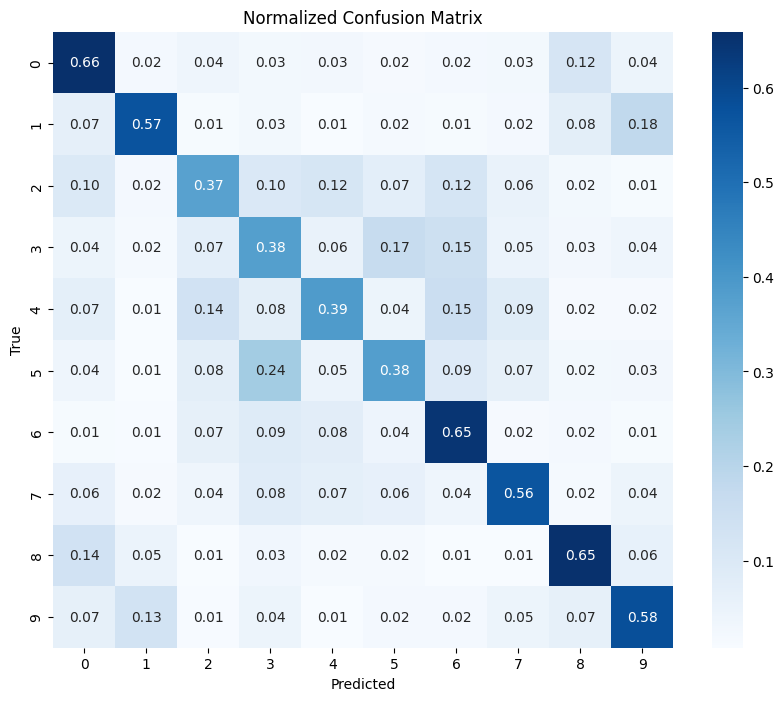

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.52      0.66      0.58      1000
     Class 1       0.66      0.57      0.61      1000
     Class 2       0.44      0.37      0.40      1000
     Class 3       0.34      0.38      0.36      1000
     Class 4       0.47      0.39      0.43      1000
     Class 5       0.45      0.38      0.41      1000
     Class 6       0.51      0.65      0.57      1000
     Class 7       0.60      0.56      0.58      1000
     Class 8       0.62      0.65      0.64      1000
     Class 9       0.57      0.58      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



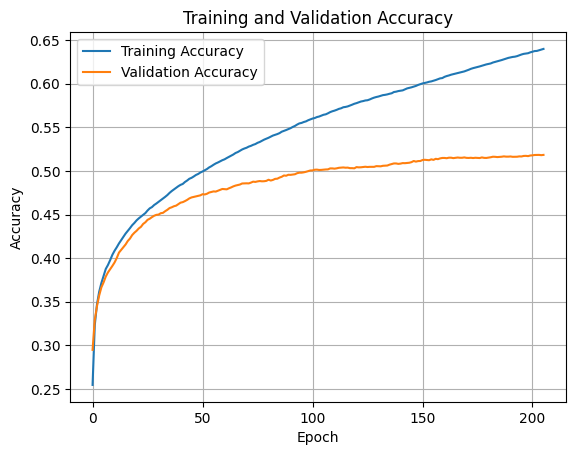

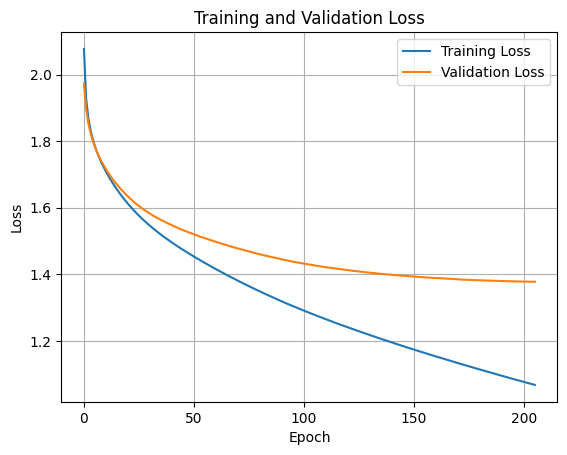

Training time: 756.39 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set the random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train_full.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train_full, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Stochastic Gradient Descent (SGD) optimizer
optimizer_stochastic = SGD(
    learning_rate=0.0001,
    momentum=0.9,
    nesterov=False
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer_stochastic,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=8,  # Stop training after 8 epochs of no improvement
    min_delta=0.001,  # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


SGD With Exponential Decay

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2808 - loss: 1.9988 - val_accuracy: 0.3727 - val_loss: 1.7781
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3881 - loss: 1.7455 - val_accuracy: 0.4001 - val_loss: 1.7029
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4192 - loss: 1.6626 - val_accuracy: 0.4153 - val_loss: 1.6567
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4380 - loss: 1.6092 - val_accuracy: 0.4229 - val_loss: 1.6237
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4505 - loss: 1.5714 - val_accuracy: 0.4340 - val_loss: 1.5966
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4626 - loss: 1.5408 - val_accuracy: 0.4438 - val_loss: 1.5747
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4716 - loss: 1.5165 - val_accuracy: 0.4489 - val_loss: 1.5570
Epoch 8/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4780 - loss: 1

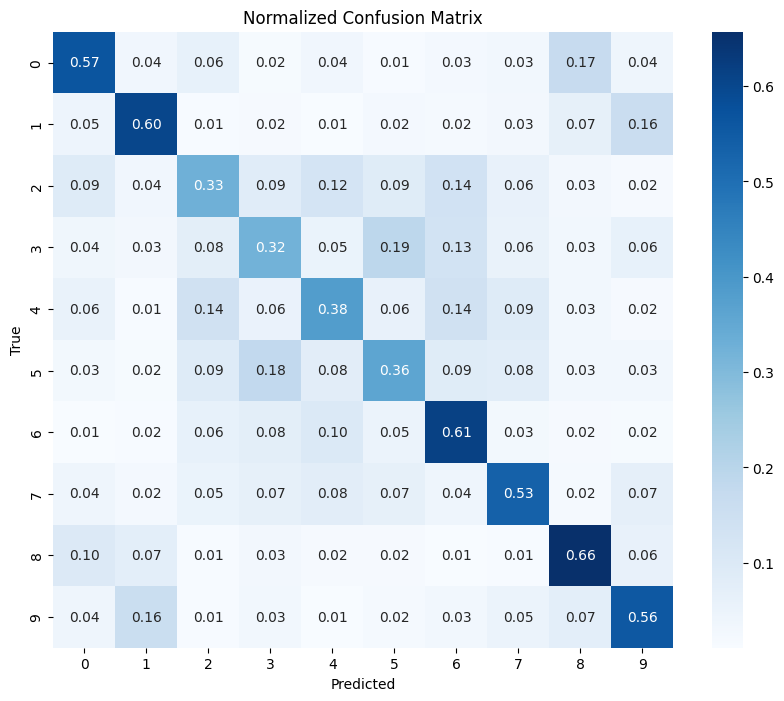

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.55      0.57      0.56      1000
     Class 1       0.60      0.60      0.60      1000
     Class 2       0.38      0.33      0.35      1000
     Class 3       0.36      0.32      0.34      1000
     Class 4       0.42      0.38      0.40      1000
     Class 5       0.40      0.36      0.38      1000
     Class 6       0.49      0.61      0.55      1000
     Class 7       0.54      0.53      0.54      1000
     Class 8       0.58      0.66      0.61      1000
     Class 9       0.53      0.56      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



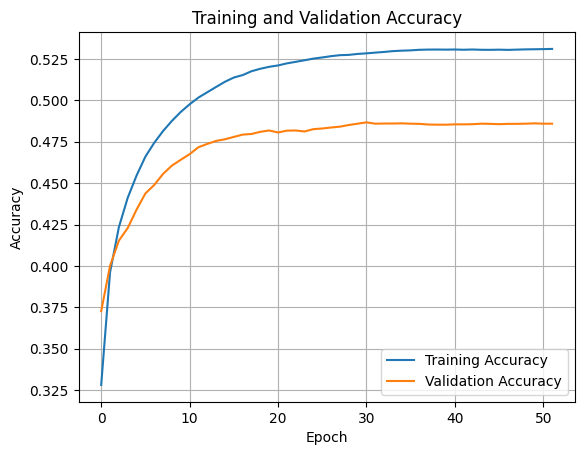

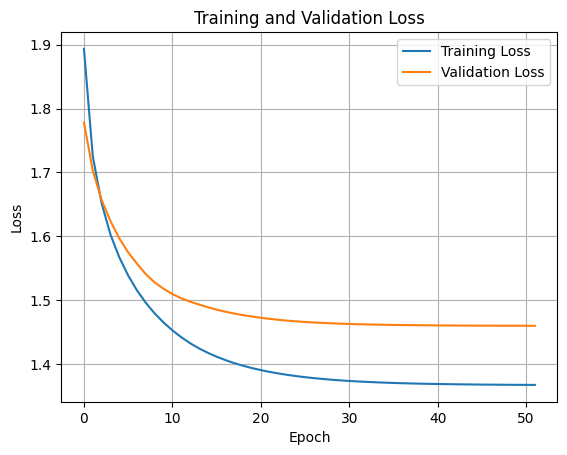

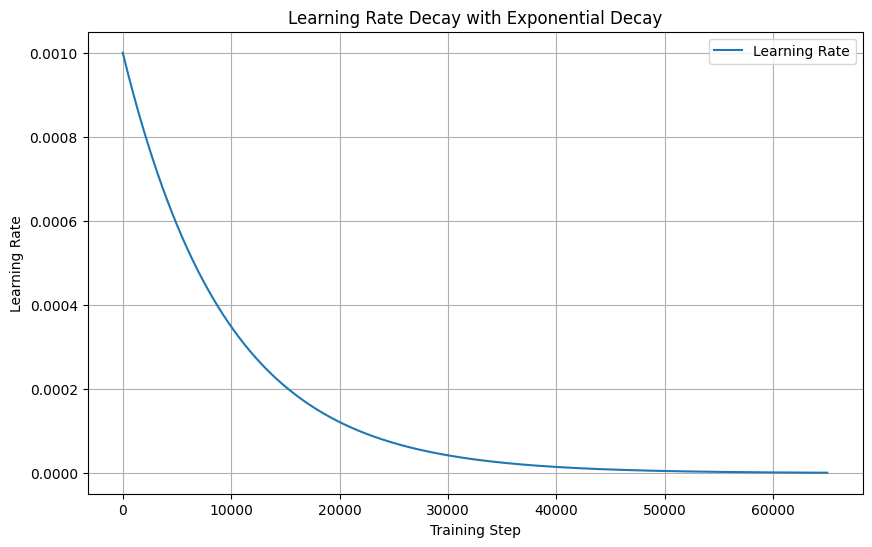

Training time: 181.11 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Learning Rate Scheduler for SGD
lr_schedule_sgd = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False
)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train_full.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train_full, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Stochastic Gradient Descent (SGD) optimizer with learning rate scheduler
optimizer_sgd = SGD(
    learning_rate=lr_schedule_sgd,
    momentum=0.9,
    nesterov=False
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer_sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,
    restore_best_weights=True
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Define training steps based on actual epochs
epochs_trained = len(history.epoch)
steps_per_epoch = len(x_train) // 32  # Calculate steps per epoch dynamically
total_steps = steps_per_epoch * epochs_trained  # Total steps trained
steps = np.arange(0, total_steps, 1)  # Generate step indices

# Get the learning rate for each step
learning_rates = [float(lr_schedule_sgd(step)) for step in steps]

# Plot the learning rate over steps
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label='Learning Rate')
plt.xlabel('Training Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay with Exponential Decay')
plt.legend()
plt.grid()
plt.show()



# Print the training time
print(f"Training time: {training_time:.2f} seconds")


SGD With Step Learning Scheduler

Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2829 - loss: 1.9990 - val_accuracy: 0.3829 - val_loss: 1.7615
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3875 - loss: 1.7421 - val_accuracy: 0.4110 - val_loss: 1.6832
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4210 - loss: 1.6605 - val_accuracy: 0.4228 - val_loss: 1.6407
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4401 - loss: 1.6072 - val_accuracy: 0.4316 - val_loss: 1.6097
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4532 - loss: 1.5675 - val_accuracy: 0.4384 - val_loss: 1.5858
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4653 - loss: 1.5383 - val_accuracy: 0.4467 - val_loss: 1.5669
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4732 - loss: 1.5139 - val_accuracy: 0.4535 - val_loss: 1.5523
Epoch 8/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4801 - loss: 1

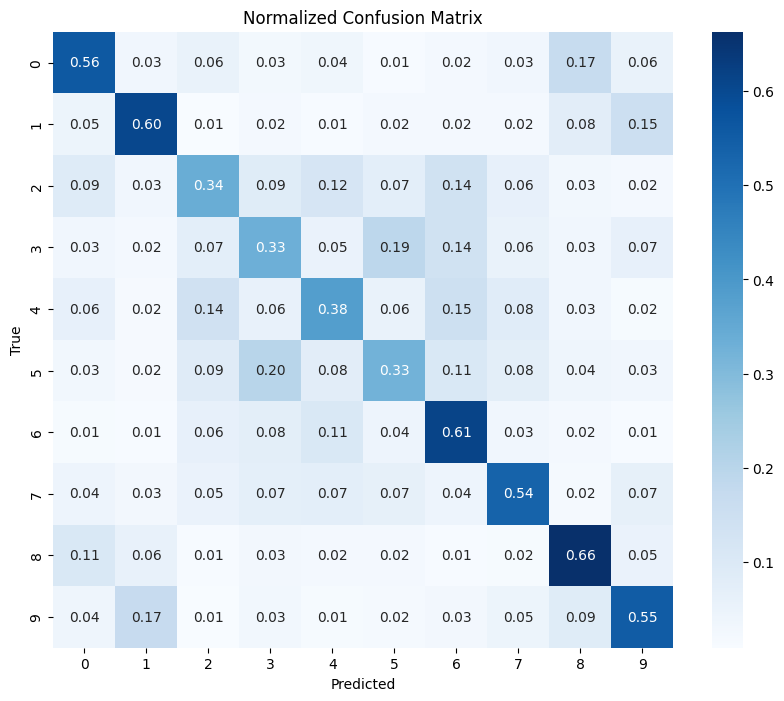

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.54      0.56      0.55      1000
     Class 1       0.60      0.60      0.60      1000
     Class 2       0.40      0.34      0.37      1000
     Class 3       0.35      0.33      0.34      1000
     Class 4       0.42      0.38      0.40      1000
     Class 5       0.39      0.33      0.35      1000
     Class 6       0.48      0.61      0.54      1000
     Class 7       0.55      0.54      0.54      1000
     Class 8       0.57      0.66      0.61      1000
     Class 9       0.53      0.55      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



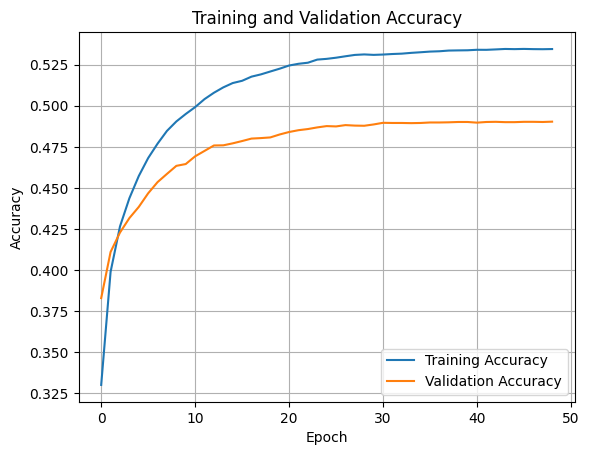

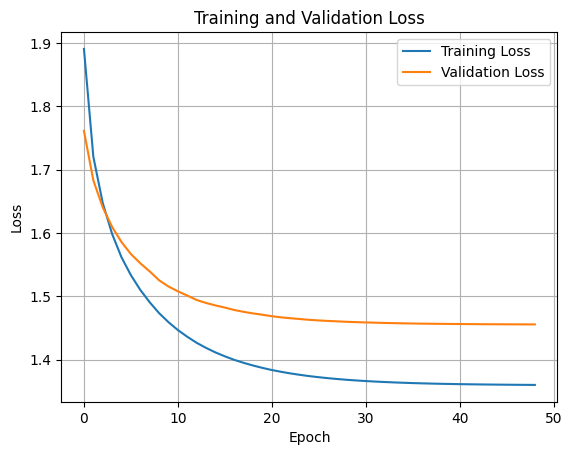

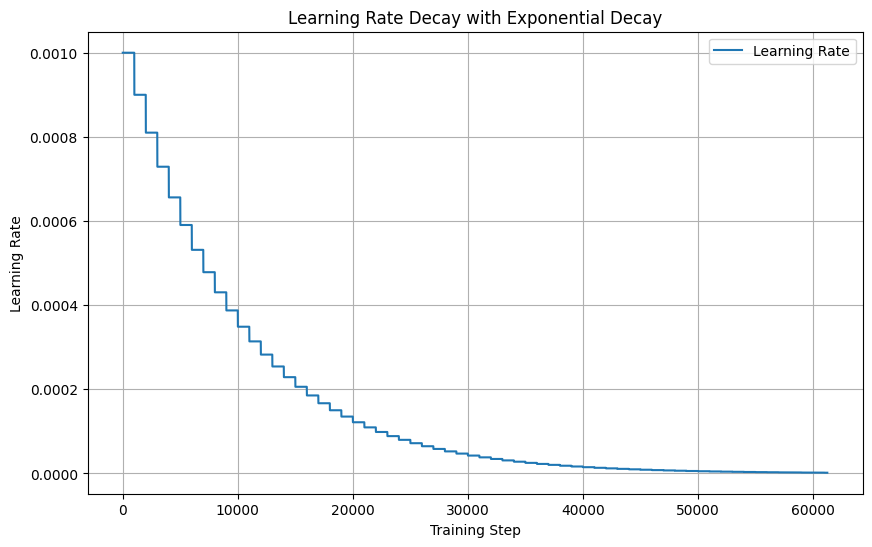

Training time: 184.69 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Learning Rate Scheduler for SGD
lr_schedule_sgd = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train_full.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train_full, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Stochastic Gradient Descent (SGD) optimizer with learning rate scheduler
optimizer_sgd = SGD(
    learning_rate=lr_schedule_sgd,
    momentum=0.9,
    nesterov=False
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer_sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,
    restore_best_weights=True
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Define the training steps to simulate
epochs_trained = len(history.epoch)
steps_per_epoch = len(x_train) // 32  # Calculate steps per epoch dynamically
total_steps = steps_per_epoch * epochs_trained  # Total steps trained
steps = np.arange(0, total_steps, 1)  # Generate step indices

# Get the learning rate for each step
learning_rates = [float(lr_schedule_sgd(step)) for step in steps]

# Plot the learning rate over steps
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label='Learning Rate')
plt.xlabel('Training Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay with Exponential Decay')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2504 - loss: 2.0412 - val_accuracy: 0.2996 - val_loss: 1.8982 - learning_rate: 0.0100
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3312 - loss: 1.8393 - val_accuracy: 0.3550 - val_loss: 1.8068 - learning_rate: 0.0100
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3481 - loss: 1.8104 - val_accuracy: 0.3693 - val_loss: 1.7664 - learning_rate: 0.0100
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3656 - loss: 1.7563 - val_accuracy: 0.3587 - val_loss: 1.8369 - learning_rate: 0.0100
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3753 - loss: 1.7410 - val_accuracy: 0.3972 - val_loss: 1.7016 - learning_rate: 0.0100
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3889 - loss: 1.7036 - val_accuracy: 0.3689 - val_loss: 1.7699 - learning_rate: 0.0100
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4

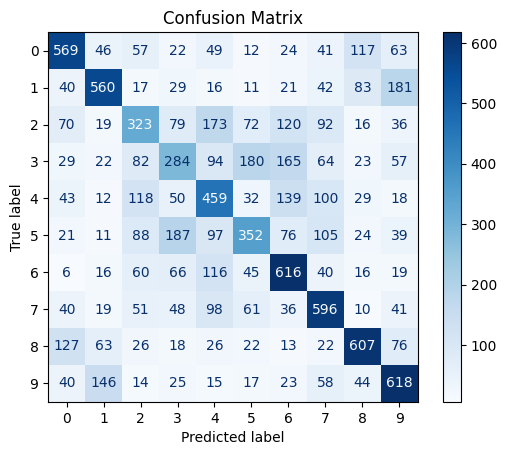

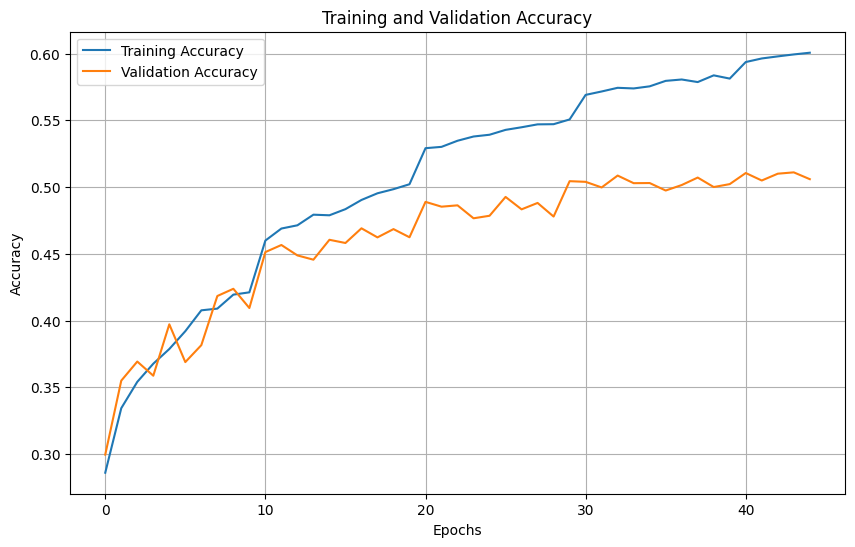

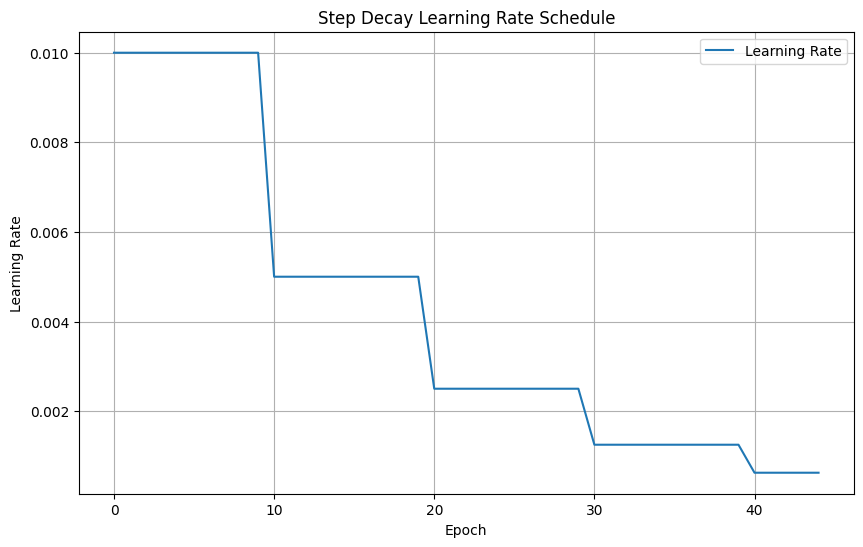

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the function to create a model
def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Define the step decay schedule
def step_decay_schedule(initial_lr, drop_factor, epochs_drop):
    def schedule(epoch):
        return initial_lr * (drop_factor ** (epoch // epochs_drop))
    return schedule

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data and convert labels to one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into training and validation sets
val_split = 0.2
val_size = int(len(x_train) * val_split)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

# Define parameters for step decay
initial_lr = 0.01
drop_factor = 0.5
epochs_drop = 10

# Create step decay schedule
step_decay = step_decay_schedule(initial_lr, drop_factor, epochs_drop)
lr_scheduler = LearningRateScheduler(step_decay)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
optimizer_sgd = SGD(learning_rate=initial_lr, momentum=0.9, nesterov=False)
model = create_model()
model.compile(optimizer=optimizer_sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop, lr_scheduler]
)
training_time = time.time() - start_time

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

# Generate confusion matrix
predictions = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, predictions)

# Display confusion matrix
ConfusionMatrixDisplay(cm, display_labels=range(10)).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot learning rate schedule
epochs_trained = len(history.epoch)
learning_rates = [step_decay(epoch) for epoch in range(epochs_trained)]

plt.figure(figsize=(10, 6))
plt.plot(range(epochs_trained), learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2604 - loss: 2.0214 - val_accuracy: 0.3414 - val_loss: 1.8354 - learning_rate: 0.0100
Epoch 2/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3468 - loss: 1.8013 - val_accuracy: 0.3827 - val_loss: 1.7278 - learning_rate: 0.0100
Epoch 3/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3685 - loss: 1.7476 - val_accuracy: 0.3653 - val_loss: 1.7535 - learning_rate: 0.0100
Epoch 4/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3791 - loss: 1.7276 - val_accuracy: 0.3859 - val_loss: 1.7028 - learning_rate: 0.0100
Epoch 5/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3920 - loss: 1.6978 - val_accuracy: 0.3860 - val_loss: 1.7091 - learning_rate: 0.0100
Epoch 6/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4048 - loss: 1.6586 - val_accuracy: 0.3718 - val_loss: 1.7640 - learning_rate: 0.0100
Epoch 7/400
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4

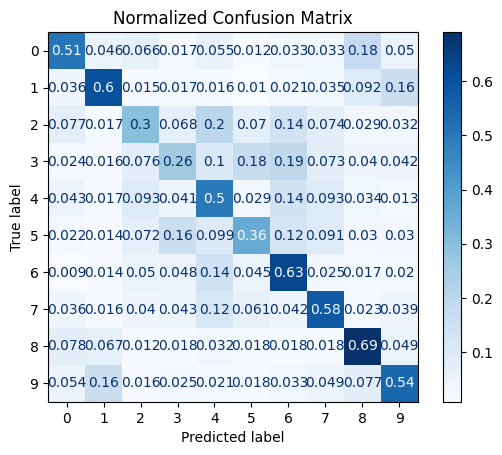

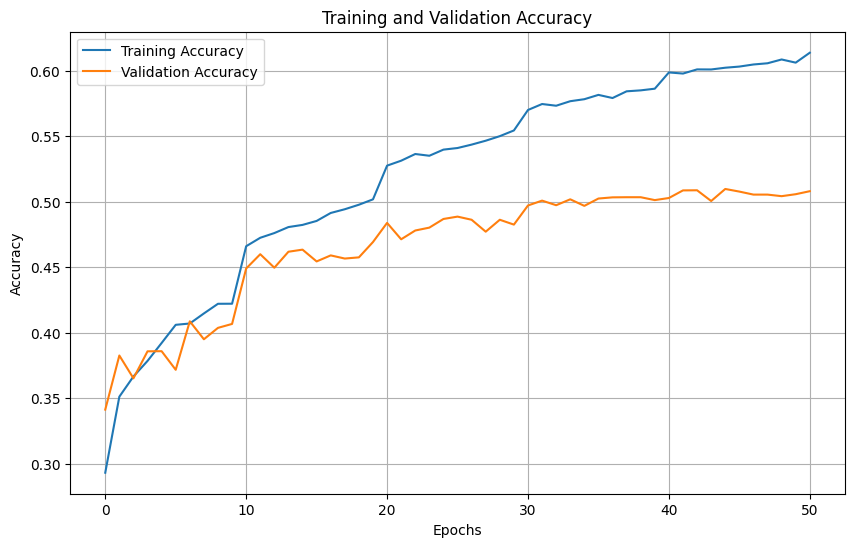

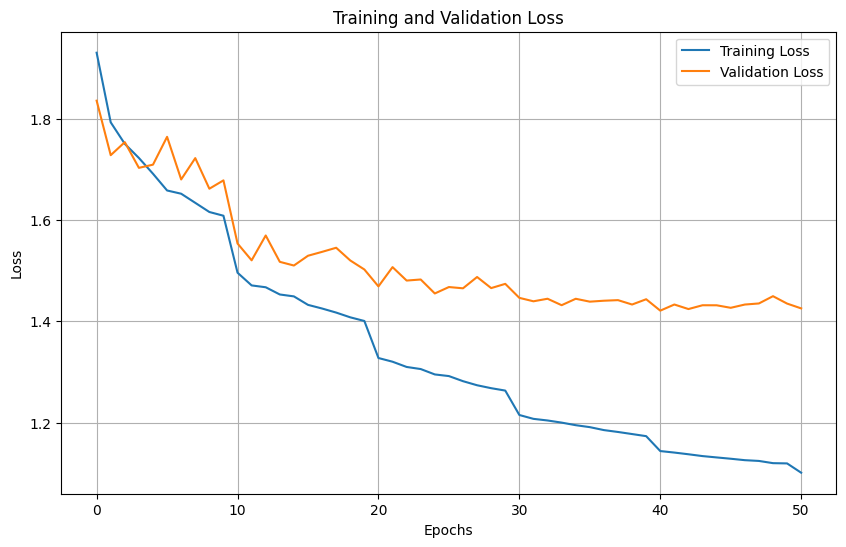

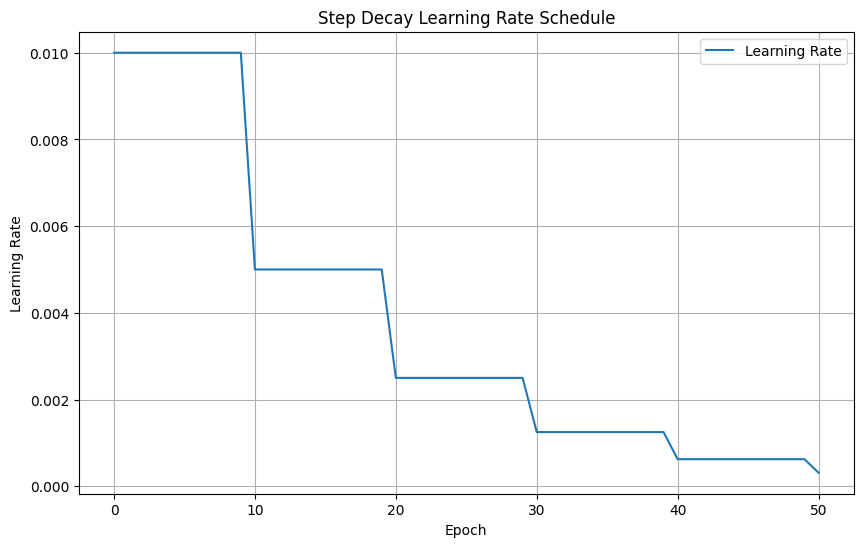

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the function to create a model
def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Define the step decay schedule
def step_decay_schedule(initial_lr, drop_factor, epochs_drop):
    def schedule(epoch):
        return initial_lr * (drop_factor ** (epoch // epochs_drop))
    return schedule

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data and convert labels to one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into training and validation sets
val_split = 0.2
val_size = int(len(x_train) * val_split)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

# Define parameters for step decay
initial_lr = 0.01
drop_factor = 0.5
epochs_drop = 10

# Create step decay schedule
step_decay = step_decay_schedule(initial_lr, drop_factor, epochs_drop)
lr_scheduler = LearningRateScheduler(step_decay)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
optimizer_sgd = SGD(learning_rate=initial_lr, momentum=0.9, nesterov=False)
model = create_model()
model.compile(optimizer=optimizer_sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=400,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop, lr_scheduler]
)
training_time = time.time() - start_time

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

# Generate confusion matrix
predictions = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, predictions, normalize='true')

# Display normalized confusion matrix
ConfusionMatrixDisplay(cm, display_labels=range(10)).plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot learning rate schedule
epochs_trained = len(history.epoch)
learning_rates = [step_decay(epoch) for epoch in range(epochs_trained)]

plt.figure(figsize=(10, 6))
plt.plot(range(epochs_trained), learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

